In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import tensorflow.contrib.learn as skflow
from sklearn.metrics import mean_squared_error

from lstm import lstm_model

In [16]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
ua = pd.read_csv('datas/mars_tianchi_user_actions.csv', parse_dates='Ds', date_parser=dateparse)
so = pd.read_csv('datas/mars_tianchi_songs.csv')

In [17]:
data = pd.merge(ua, so, on=['song_id'])
arts = data[data.action_type == 1].groupby(['artist_id', 'Ds'])['action_type'].sum()
arts.to_csv('datas/arts.csv')
arts = pd.read_csv('datas/arts.csv', names=['artist_id', 'Ds', 'plays'], parse_dates='Ds', date_parser=dateparse, 
                   index_col='Ds')

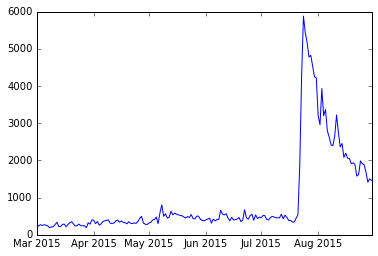

In [18]:
one = arts[arts.artist_id == 'c026b84e8f23a7741d9b670e3d8973f0']
one.pop('artist_id')
plt.plot(one)

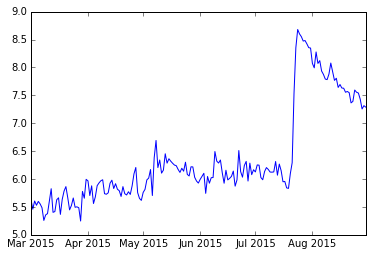

In [19]:
ts = pd.Series(data=one['plays'], index=one.index)
ts.dropna(inplace=True)
ts_log = np.log(ts)
plt.plot(ts_log)

In [2]:
LOG_DIR = './lstm.log'
TIMESTEPS = 7
RNN_LAYERS = [{'steps': TIMESTEPS}, {'steps': 7, 'keep_prob': 0.5}]
DENSE_LAYERS = [2]
TRAINING_STEPS = 10000
BATCH_SIZE = 182
PRINT_STEPS = TRAINING_STEPS / 100

In [3]:
regressor = skflow.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                       verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                       learning_rate=0.03, batch_size=BATCH_SIZE)

## STL

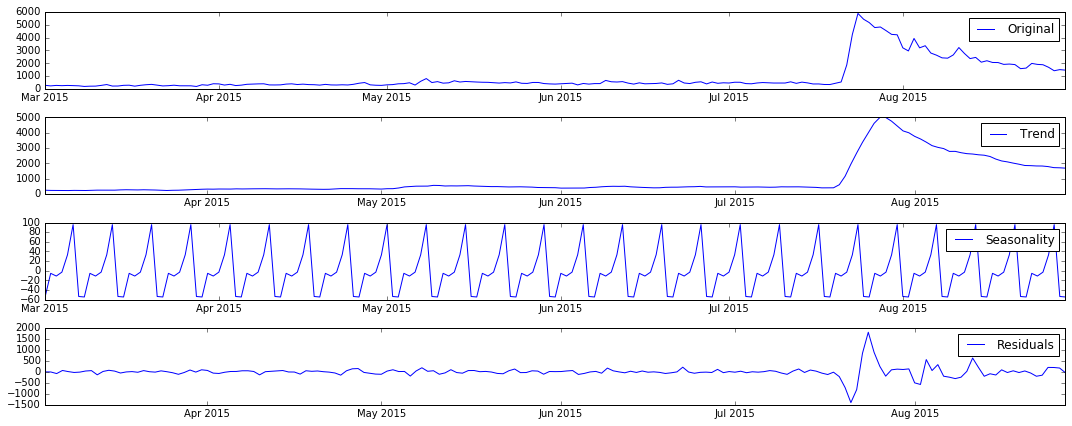

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, freq=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [28]:
trend.dropna(inplace=True)
trend.index.dayofyear - 63

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176], dtype=int32)

In [29]:
X = trend.index.dayofyear - 63
y = trend.tolist()
X = np.array(X)
y = np.array(y)

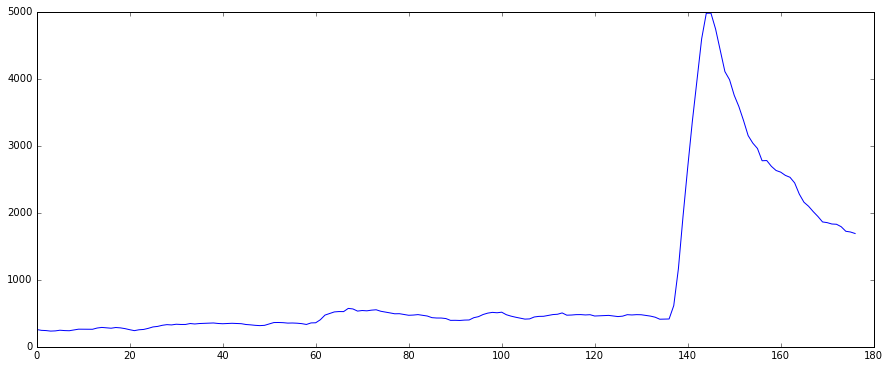

In [42]:
plt.plot(X, y)

In [31]:
realX = []
for i in range(len(X) - TIMESTEPS):
    realX.append([[x] for x in X[i:i+TIMESTEPS]])

In [32]:
realX = np.array(realX)
realY = np.array(y[TIMESTEPS-1:-1])

In [33]:
realX = realX.astype('float32')
realY = realY.astype('float32')

In [34]:
tX = range(0, 243)
testX = []
for i in range(152,182 + 61 - TIMESTEPS):
    testX.append([[x] for x in tX[i:i+TIMESTEPS]])

In [35]:
testX = np.array(testX)
testX = testX.astype('float32')

In [36]:
# create a lstm instance and validation monitor
regressor.fit(realX, realY, logdir=LOG_DIR)

Step #100, epoch #100, avg. train loss: 1095005.50000
Step #200, epoch #200, avg. train loss: 1083258.75000
Step #300, epoch #300, avg. train loss: 1074502.50000
Step #400, epoch #400, avg. train loss: 1066719.50000
Step #500, epoch #500, avg. train loss: 1059417.50000
Step #600, epoch #600, avg. train loss: 1052449.50000
Step #700, epoch #700, avg. train loss: 1045726.37500
Step #800, epoch #800, avg. train loss: 1039198.56250
Step #900, epoch #900, avg. train loss: 1032839.12500
Step #1000, epoch #1000, avg. train loss: 1026617.68750
Step #1100, epoch #1100, avg. train loss: 1020521.37500
Step #1200, epoch #1200, avg. train loss: 1014533.68750
Step #1300, epoch #1300, avg. train loss: 1008651.62500
Step #1400, epoch #1400, avg. train loss: 1002858.18750
Step #1500, epoch #1500, avg. train loss: 997156.87500
Step #1600, epoch #1600, avg. train loss: 991538.62500
Step #1700, epoch #1700, avg. train loss: 985994.06250
Step #1800, epoch #1800, avg. train loss: 980527.75000
Step #1900, ep

TensorFlowEstimator(batch_size=182, class_weight=None, clip_gradients=5.0,
          config=None, continue_training=False, learning_rate=0.03,
          model_fn=<function _lstm_model at 0x11007d938>, n_classes=0,
          optimizer='Adagrad', steps=10000, verbose=1)

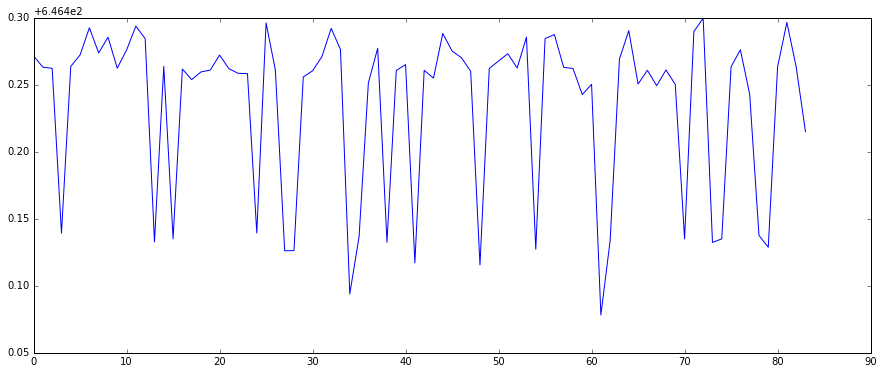

In [37]:
predict = regressor.predict(testX)
plt.plot(predict)

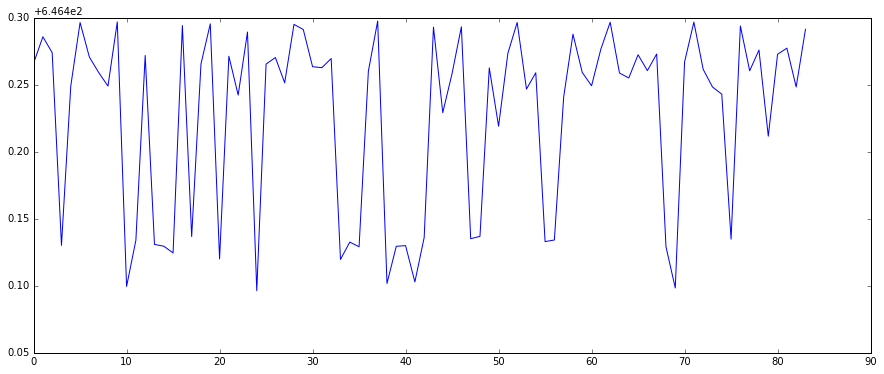

In [38]:
predict = regressor.predict(testX)
plt.plot(predict)

In [39]:
len(testX)

84

In [31]:
import datetime
daydiff = [x for x in range(60)]
day = [(datetime.date(2015, 9, 1) + datetime.timedelta(x)).strftime("%Y%m%d") for x in range(60)]

In [35]:
res = pd.DataFrame()
res['artist_id'] = [a1 for x in range(60)]
res['plays'] = predict[1:]
res['plays'] = res['plays'].astype('int')
res['Ds'] = day

In [36]:
res.head()

,artist_id,plays,Ds
0,023406156015ef87f99521f3b343f71f,437,20150901
1,023406156015ef87f99521f3b343f71f,437,20150902
2,023406156015ef87f99521f3b343f71f,433,20150903
3,023406156015ef87f99521f3b343f71f,437,20150904
4,023406156015ef87f99521f3b343f71f,438,20150905


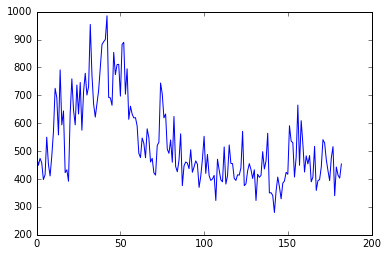

In [16]:
plt.plot(X,y)

ValueError: x and y must have same first dimension

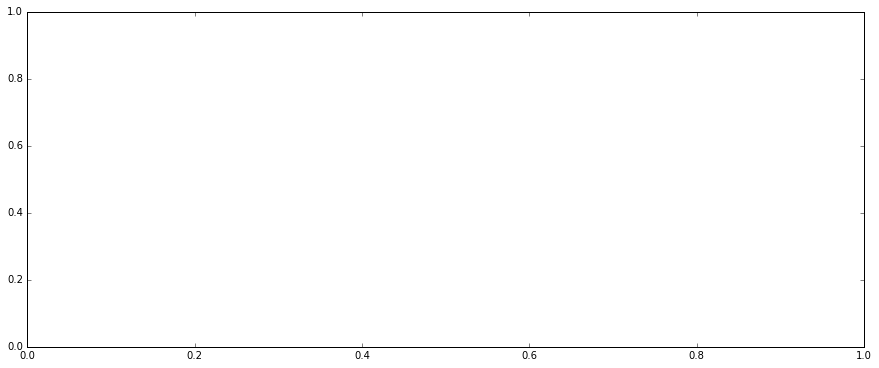

In [40]:
lx = range(0, 244)
ly = []
ly.extend(y)
ly.extend(predict)
plt.plot(lx, ly)

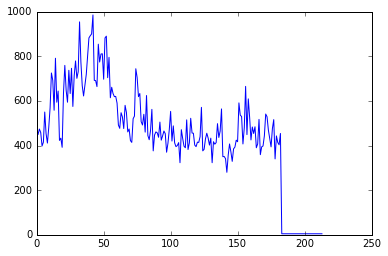

In [56]:
ly = []
ly.extend(y)
ly.extend(predict)
lx = range(0, len(ly))
plt.plot(lx, ly)

In [29]:
len(ly)

267

In [58]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [59]:
ts

2000-01-31    0.057476
2000-02-29    1.072007
2000-03-31    0.129043
2000-04-30   -1.375792
Freq: M, dtype: float64

In [60]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.057476
2000-04-30    1.072007
Freq: M, dtype: float64

In [61]:
ts.shift()

2000-01-31         NaN
2000-02-29    0.057476
2000-03-31    1.072007
2000-04-30    0.129043
Freq: M, dtype: float64

In [27]:
import datetime

In [30]:
(datetime.date(2015, 9, 1) + datetime.timedelta(0)).strftime("%Y%m%d")

'20150901'

In [11]:
artist_set[-1:20]

Index([], dtype='object', name=u'artist_id')

In [13]:
artist_set[49]

'ffd47cf9cb66d226575336f0fa42ae25'

In [ ]:
artist_set = arts.index

result = pd.DataFrame(columns=['artist_id', 'plays', 'Ds'])
i = 49
while i >= 24:
    a1 = artist_set[i]
    i -= 1
    # prepare train data
    X = apts.ix[a1].index.tolist()
    y = apts.ix[a1].tolist()
    X = np.array(X)
    y = np.array(y)

    realX = []
    for i in range(len(X) - TIMESTEPS):
        realX.append([[x] for x in X[i:i+TIMESTEPS]])

    realX = np.array(realX)
    realY = np.array(y[TIMESTEPS-1:-1])

    realX = realX.astype('float32')
    realY = realY.astype('float32')

    # test data
    tX = range(0, 243)
    testX = []
    for i in range(152, 182 + 61 - TIMESTEPS):
        testX.append([[x] for x in tX[i:i+TIMESTEPS]])

    testX = np.array(testX)
    testX = testX.astype('float32')

    # model
    regressor = skflow.TensorFlowEstimator(
        model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
        verbose=1,  steps=TRAINING_STEPS,
        optimizer='Adagrad',
        learning_rate=0.03,
        batch_size=BATCH_SIZE)

    regressor.fit(realX, realY, logdir=LOG_DIR)

    predict = regressor.predict(testX)

    day = [(datetime.date(2015, 9, 1) +
            datetime.timedelta(x)).strftime("%Y%m%d") for x in range(60)]

    res = pd.DataFrame()
    res['artist_id'] = [a1 for x in range(60)]
    res['plays'] = predict[1:]
    res['Ds'] = day

    result = pd.concat([result, res])
    result['plays'] = result['plays'].astype('int')
    result.to_csv('datas/lstm_predict_2.csv', index=False)


In [43]:
len(X)

183

In [44]:
len(y)

183

In [90]:
testX.shape

(30, 0)

In [91]:
realX.shape

(153, 30, 1)

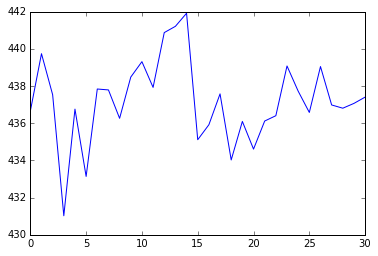

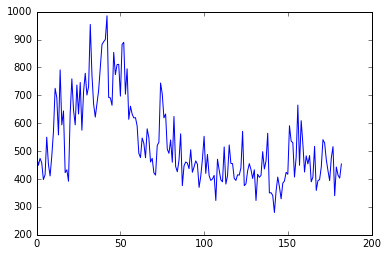